# Sampling

Just a demonstration of some sampling techniques (rejection sampling, importance sampling, sampling importance resampling, Metropolis sampling, Gibbs sampling) on a single toy problem. The code is written in python/numpy/scipy and is not optimised for speed.

You can either check sampling.py or skim through the corresponding iPython notebook sampling.ipynb (web: http://nbviewer.ipython.org/urls/raw.github.com/n0mad/sampling-study/master/sampling.ipynb)


Here are some examples on sampling techniques, mostly following C.M. Bishop's book [Pattern Recognition and Machine Learning], http://research.microsoft.com/en-us/um/people/cmbishop/PRML/. As a model task we consider the problem of sampling from a uniform distribution over square (the target distribution) if we are only allowed to sample from a Gaussian distribution (the proposal distribution). All the examples are implemented as demo_* functions in sampling.py.



In [6]:
from sampling import *
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # plt绘图报错（不显示图的问题）

Firstly, we describe the proposal and target distributions:



In [7]:
print( 'Proposal distribution is N(%s, %s)'%(proposal_mean, proposal_std))
print( 'Target distribution is the uniform over the square with x_0 in [%s, %s] and x_1 in [%s, %s]'%(target_x_0[0], target_x_0[1], target_x_1[0], target_x_1[1]))

Proposal distribution is N([1.0, 1.0], [1.5, 2.0])
Target distribution is the uniform over the square with x_0 in [-1.0, 1.0] and x_1 in [-1.0, 1.0]


ValueError: x and y must have same first dimension, but have shapes (1,) and (5, 2)

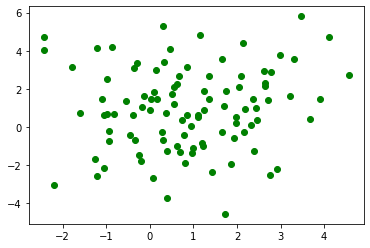

In [8]:
#plotting the proposal and target distributions

#getting a sample from the proposal distribution
proposal = proposal_sample(100)
#plotting it
plt.scatter(proposal[:, 0], proposal[:,1], color = 'green')

#plotting the bounds of the target distr
plot_target()

#setting the plotting options
plt.grid(True)
plt.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
plt.ylim(target_x_1[0] - 3, target_x_1[1] + 3)


## Rejection sampling

In [ ]:
#Next, we demonstrate how we can use rejection sampling to obtain a sample from the target distribution
#if we're allowed to sample from the proposal distribution only (see demo_rejection() in sampling.py)

#obtaining parameter K
rejection_K = rejection_sampling_K()

Now we are ready to sample from the proposal distribution:

In [ ]:
size = 1000
sample = proposal_sample(size)



Let's check the sample's mean to ensure it corresponds to our Gaussian:

In [ ]:
#as we see, the mean of the proposed sample is close to the center of the Gaussian
print( 'mean of the proposal sample', sample.mean(0))

Indeed, it is close to the Gaussian's center. Next, we apply the rejection sampling to our sample:

In [ ]:
accepted, rejected = rejection_sampling(sample, rejection_K)
print( 'mean of the sample from the target distribution', accepted.mean(0))

Voila, the mean of the new sample is close to the mean of the target distribution. Further, we plot both samples:

In [ ]:
#plotting the whole thing
plot_target()

#points rejected in blue
plt.scatter(rejected[:, 0], rejected[:, 1], color='blue')
#points accepted in green
plt.scatter(accepted[:, 0], accepted[:, 1], color='green')

plt.grid(True)
plt.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
plt.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

As we see from the figure above, only points within the square are accepted as a sample from the target distribution (not all of them).

## Importance sampling
Another technique is importance sampling. Importance sampling estimator re-weights points generated by the proposal distribution so it can be used to estimate some statistics (e.g., mean) of the obtained sample as if it was produced from the target distribution. Importance sampling cannot be used to obtain a sample from the target distribution.



In [ ]:
size = 1000

sample = proposal_sample(size)
weights = importance_sampling(sample)
print( 'mean of the proposal sample', sample.mean(0))
print( 'mean of the target sample', (sample * np.array([weights, weights]).T).mean(0))

Again, we note that the mean of the obtained sample is close to that of the targer distribution.

## Importance sampling-resampling
In contrast to importance sampling, importance sampling-resampling can be used to sample from the target distribution.



In [ ]:
#Further, importance sampling-resampling

iterations = 100
proposal_size = 100
target_size = 10

resample, sample = sampling_resampling(iterations, proposal_size, target_size)
print( 'mean of the proposal sample', sample.mean(0))
print( 'mean of the target sample', resample.mean(0))
print( 'resample size %s, total %s'%(resample.shape[0], sample.shape[0]))


Everything seems to be OK. Let's plot the samples.

In [ ]:
plot_target()

plt.scatter(sample[:, 0], sample[:, 1], color='red')
plt.scatter(resample[:, 0], resample[:, 1], color='green')


plt.grid(True)
plt.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
plt.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

As expected, the resulting sample (green) contains points only from the rectangle.

## Metropolis
In our case the proposal distribution is symmetric, thus Metropolis sampling is equivalent to Metropolis-Hastings. The poposal distribution is used slightly differenently this time (see the book). Also, since the points in the sample are severely correlated, we sub-sample every 10th point before including it in the resulting sample.

In [ ]:
size = 10000
sieve = [10 *k for k in range(1000)]
accepted, rejected = metropolis_sampling(size)
accepted = accepted[sieve, :]

print( 'mean of the resulting sample', accepted.mean(0))
print( 'accepted %s, rejected %s, total %s'%(accepted.shape[0], rejected.shape[0], size))

Let's plot the results:



In [ ]:
plot_target()
plt.scatter(rejected[:, 0], rejected[:, 1], color='blue')
plt.scatter(accepted[:, 0], accepted[:, 1], color='green')

plt.grid(True)
plt.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
plt.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

## Gibbs sampling
Finally, Gibbs sampling.

In [ ]:
target_size = 1000
sample = gibbs_sampling(target_size)

print( 'mean of the resulting sample', sample.mean(0))
plot_target()
plt.scatter(sample[:, 0], sample[:, 1], color='green')
plt.grid(True)
plt.xlim(target_x_0[0] - 3, target_x_0[1] + 3)
plt.ylim(target_x_1[0] - 3, target_x_1[1] + 3)

